In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
raw_df = pd.read_csv("data\CleanData.csv", index_col=0)

In [3]:
raw_df.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Neighborhood full name
Order,,,,,,,,,,,,,,,,,,,,,
1,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,5,2010,WD,Normal,215000,North Ames
2,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,120,0,0,6,2010,WD,Normal,105000,North Ames
3,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,12500,6,2010,WD,Normal,172000,North Ames
4,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,4,2010,WD,Normal,244000,North Ames
5,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,3,2010,WD,Normal,189900,Gilbert


# Correlation

<AxesSubplot:>

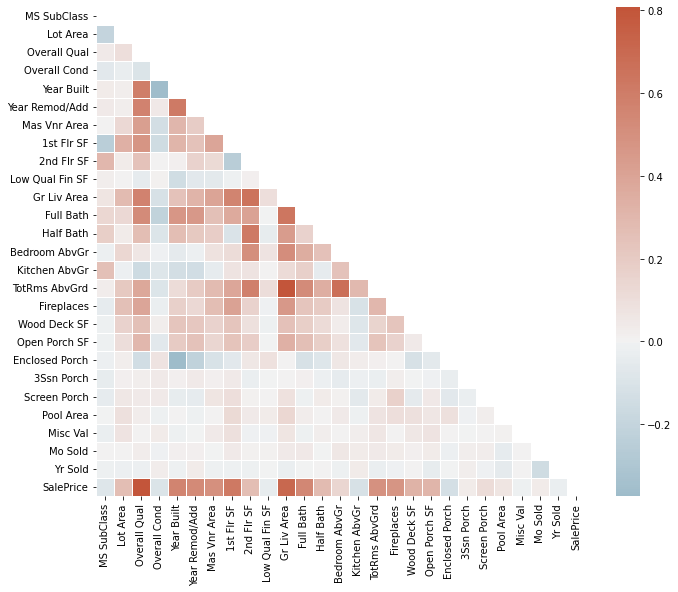

In [4]:
corr = raw_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

In [5]:
corr["SalePrice"][corr["SalePrice"] > 0.60]

Overall Qual    0.799262
1st Flr SF      0.621676
Gr Liv Area     0.706780
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [6]:
corr["SalePrice"][corr["SalePrice"] < -0.1]

Overall Cond     -0.101697
Kitchen AbvGr    -0.119814
Enclosed Porch   -0.128787
Name: SalePrice, dtype: float64

# Thoughts

Observations such as the high correlation between price and overall quality, area above ground level and area on the second floor are not surprising.
However, the discovery that the overall condition of a house is gently but nevertheless inversely correlated with price is quite intriguing and warrants further analysis.

# Dealing with outliers

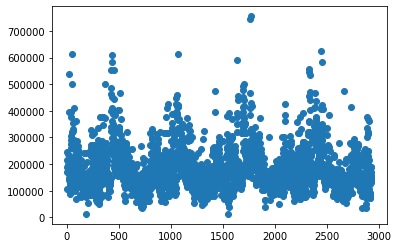

In [7]:
plt.scatter(x = raw_df.index, y = raw_df["SalePrice"])

In [8]:
min(raw_df["SalePrice"])

12789

In [9]:
len(raw_df)/100*2 #2% is ~ 58 records 

58.6

# We decided to remove 2% of the most expensive apartments and 2% of the cheapest ones

In [10]:
without_outliers = raw_df.sort_values(by="SalePrice")

In [11]:
without_outliers

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Neighborhood full name
Order,,,,,,,,,,,,,,,,,,,,,
182,30,RM,9656,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,0,0,0,0,6,2010,WD,Abnorml,12789,Old Town
1554,20,A (agr),14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,...,0,0,0,0,2,2008,WD,Abnorml,13100,Iowa DOT and Rail Road
727,30,C (all),7879,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,11,2009,WD,Abnorml,34900,Iowa DOT and Rail Road
2844,30,RL,8088,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,2,2006,ConLD,Normal,35000,Edwards
2881,20,C (all),9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,10,2006,WD,Abnorml,35311,Iowa DOT and Rail Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,3,2010,New,Partial,611657,Northridge Heights
1064,20,RL,12720,Pave,Reg,HLS,AllPub,Inside,Mod,NridgHt,...,0,216,144,0,2,2008,WD,Normal,615000,Northridge Heights
2446,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,...,0,0,0,0,7,2006,WD,Normal,625000,Northridge


In [12]:
without_outliers1 = without_outliers.head(2872)

In [13]:
without_outliers1

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Neighborhood full name
Order,,,,,,,,,,,,,,,,,,,,,
182,30,RM,9656,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,0,0,0,0,6,2010,WD,Abnorml,12789,Old Town
1554,20,A (agr),14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,...,0,0,0,0,2,2008,WD,Abnorml,13100,Iowa DOT and Rail Road
727,30,C (all),7879,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,11,2009,WD,Abnorml,34900,Iowa DOT and Rail Road
2844,30,RL,8088,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,2,2006,ConLD,Normal,35000,Edwards
2881,20,C (all),9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,10,2006,WD,Abnorml,35311,Iowa DOT and Rail Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,60,RL,46589,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,...,0,0,0,0,7,2009,WD,Normal,402000,Northridge
431,20,RL,12220,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,9,2009,New,Partial,402861,Northridge Heights
496,60,RL,15138,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,...,0,0,0,0,7,2009,WD,Normal,403000,Northridge


In [14]:
without_outliers2 = without_outliers1.tail(2814)

In [15]:
without_outliers2

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Neighborhood full name
Order,,,,,,,,,,,,,,,,,,,,,
2289,160,RM,2001,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,1,2007,WD,Normal,75000,Meadow Village
944,30,C (all),10200,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,5,2009,WD,Normal,75000,Iowa DOT and Rail Road
2678,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,...,0,0,0,0,11,2006,ConLI,Abnorml,75000,Brookside
2291,160,RM,1890,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,4,2007,COD,Normal,75190,Meadow Village
2238,30,RM,3672,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,9,2007,WD,Normal,75200,Iowa DOT and Rail Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,60,RL,46589,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,...,0,0,0,0,7,2009,WD,Normal,402000,Northridge
431,20,RL,12220,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,9,2009,New,Partial,402861,Northridge Heights
496,60,RL,15138,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,...,0,0,0,0,7,2009,WD,Normal,403000,Northridge


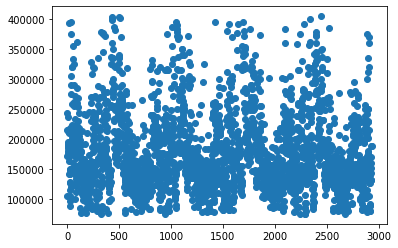

In [16]:
plt.scatter(x = without_outliers2.index, y = without_outliers2["SalePrice"])

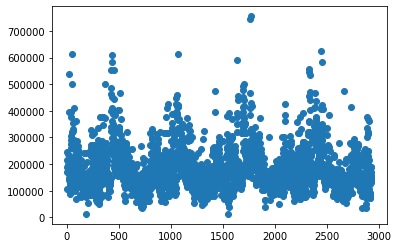

In [17]:
plt.scatter(x = raw_df.index, y = raw_df["SalePrice"])

# Dummies Variables with first column drop

In [18]:
dummies_df = pd.get_dummies(without_outliers2, drop_first = True)

# Spliting on X and y labels and train/test split with test size = 30%

In [19]:
y = dummies_df["SalePrice"]

In [20]:
X = dummies_df.drop(axis = 1, labels = "SalePrice")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
X_train

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,1st Flr SF,2nd Flr SF,Low Qual Fin SF,...,Neighborhood full name_Northridge Heights,Neighborhood full name_Northwest Ames,Neighborhood full name_Old Town,Neighborhood full name_Sawyer,Neighborhood full name_Sawyer West,Neighborhood full name_Somerset,Neighborhood full name_South & West of Iowa State University,Neighborhood full name_Stone Brook,Neighborhood full name_Timberland,Neighborhood full name_Veenker
Order,,,,,,,,,,,,,,,,,,,,,
1452,20,7180,5,7,1972,1972,0.0,864,0,0,...,0,0,0,0,0,0,0,0,0,0
827,20,8814,7,5,2006,2006,180.0,1604,0,0,...,0,0,0,0,0,0,0,0,0,0
1780,20,10612,8,5,2006,2006,248.0,1534,0,0,...,0,0,0,0,0,1,0,0,0,0
970,20,12518,5,7,1968,1968,182.0,1008,0,0,...,0,0,0,0,0,0,0,0,0,0
759,50,5160,6,6,1927,1950,0.0,1204,462,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,80,7700,5,7,1956,1956,0.0,1145,0,0,...,0,0,0,0,0,0,0,0,0,0
2440,60,10852,6,5,2000,2000,0.0,959,712,0,...,0,0,0,0,0,0,0,0,0,0
1913,80,9600,6,5,1961,1961,291.0,1254,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
predictions = lm.predict(X_test)

# Linear Regression

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 44748.31677191585
MSE: 3282646455.2398276
RMSE: 57294.3841509779


In [29]:
r2_score(y_test, predictions)

0.20097736938595645

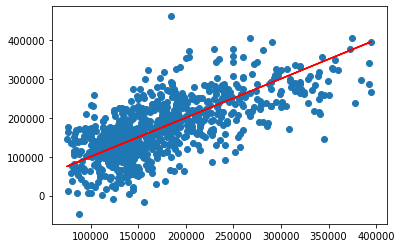

In [30]:
plt.scatter(y_test, predictions)

# Real Value
plt.plot(y_test, y_test, 'r')

# Ridge Regression

In [31]:
from sklearn.linear_model import Ridge 

In [32]:
grid_params = {
    'alpha': (np.logspace(-8, 8, 10)),
    'tol': (np.logspace(0, 0.1, 10))
}

In [33]:
ridge = Ridge()

# Based on GridCV best params are: alpha = 7,75 and tol = 1.0

In [34]:
ridgeGrid = GridSearchCV(ridge, grid_params, cv = 10)

In [35]:
ridgeGrid.fit(X_train,y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular ma

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=9.15251e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_m

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-condi

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.7405e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_mo

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.36638e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_m

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.36638e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_m

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.9926e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.36385e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.44741e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.4905e-17): result may not be accurate.
  dual_coef = linalg.sol

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.44741e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.4905e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.46903e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.82587e-17): result may not be accurate.
  dual_coef = linalg.so

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.46903e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.82587e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.44637e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.66678e-17): result may not be accurate.
  dual_coef = linalg.s

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-08, 5.99484250e-07, 3.59381366e-05, 2.15443469e-03,
       1.29154967e-01, 7.74263683e+00, 4.64158883e+02, 2.78255940e+04,
       1.66810054e+06, 1.00000000e+08]),
                         'tol': array([1.        , 1.02591437, 1.05250029, 1.07977516, 1.10775685,
       1.13646367, 1.1659144 , 1.19612833, 1.22712524, 1.25892541])})

In [39]:
ridgeGrid.best_params_

{'alpha': 7.742636826811277, 'tol': 1.0}

In [36]:
predictions = ridgeGrid.predict(X_test)

# Ridge + Grid Results

In [37]:
r2_score(y_test, predictions)

0.8629251086255916

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSE:', metrics.mean_absolute_error(y_test, predictions)/np.mean(y_test)*100, "%")

MAE: 15165.47783183526
RMSE: 23730.750367111385
RMSE: 8.68699738271527 %


In [ ]:
col_names = dummies_df.columns[dummies_df.columns != "SalePrice"]

In [ ]:
LinearRegCoef = pd.DataFrame(data = ridge.coef_, index=col_names)

In [119]:
LinearRegCoef = LinearRegCoef.transpose()

In [123]:
LinearRegCoef

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,1st Flr SF,2nd Flr SF,Low Qual Fin SF,...,Neighborhood full name_Northridge Heights,Neighborhood full name_Northwest Ames,Neighborhood full name_Old Town,Neighborhood full name_Sawyer,Neighborhood full name_Sawyer West,Neighborhood full name_Somerset,Neighborhood full name_South & West of Iowa State University,Neighborhood full name_Stone Brook,Neighborhood full name_Timberland,Neighborhood full name_Veenker
0,-114.790718,0.779444,8192.184779,3926.783079,230.507626,106.083015,2.046179,10.380544,16.805837,3.324386,...,12328.301046,-3375.907391,-3953.575864,-3935.099222,-3910.957707,5426.707621,-3618.14485,12801.140016,-1250.855979,1286.245427


# Thoughts Ridge Regression make really nice job